In [5]:
import numpy as np, scipy, matplotlib.pyplot as plt, pandas as pd
import sklearn, IPython.display as ipd
import librosa, librosa.display

from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from pathlib import Path
%matplotlib inline

In [6]:
numpy.ones(2)

array([1., 1.])

In [8]:
np.ones(2)

array([1., 1.])

In [3]:
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = None

In [4]:
file = 'audio/etc/arr_1.mp3'
x, sr = librosa.load(file, duration=30, offset=10)

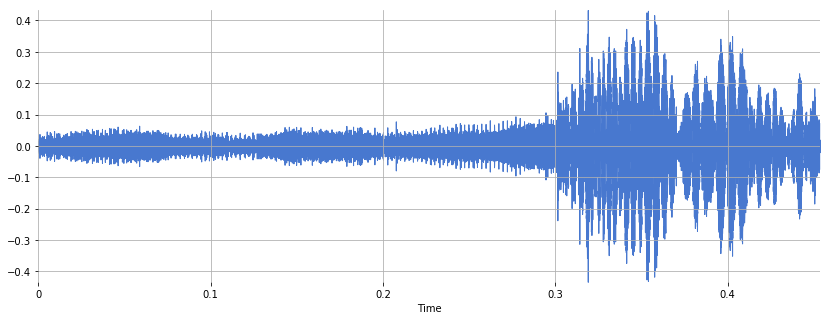

In [5]:
librosa.display.waveplot(x[:10000])

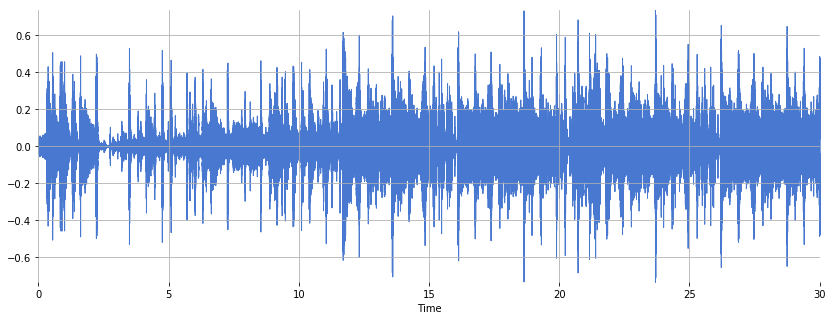

In [6]:
librosa.display.waveplot(x)

In [7]:
ipd.Audio(x, rate=sr)

In [8]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
    ]

In [9]:
extract_features(x)

/home/kameswar/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.pad((y_sign[slice_post] != y_sign[slice_pre]),


[0.16259765625, 5452.734223412146]

In [10]:
def extract_features(x, fs):
    zcr = librosa.zero_crossings(x).sum()
    energy = scipy.linalg.norm(x)
    return [zcr, energy]

In [11]:
frame_sz = sr*0.090
extract_features(x, sr)

/home/kameswar/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.pad((y_sign[slice_post] != y_sign[slice_pre]),


[160601, 70.31082153320312]

In [12]:
zcr = librosa.feature.zero_crossing_rate(x)
print(zcr.shape)
print(zcr)
print(zcr [0,0])
print(zcr [0,5])
print(zcr.mean())
print(zcr.sum())

(1, 1292)
[[0.16259766 0.22021484 0.28466797 ... 0.11230469 0.14941406 0.13378906]]
0.16259765625
0.31689453125
0.2424456239115712
313.23974609375


/home/kameswar/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.pad((y_sign[slice_post] != y_sign[slice_pre]),


In [13]:
zc = librosa.zero_crossings(x)
print(zc)
print(zc.shape)
print(zc.sum())

[ True  True  True ... False False False]
(661500,)
160601


/home/kameswar/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.pad((y_sign[slice_post] != y_sign[slice_pre]),


In [14]:
sc = librosa.feature.spectral_centroid(x)
print(sc.shape)
print(sc)
print(sc.mean())

(1, 1292)
[[5452.73422341 5270.66884763 4844.2552716  ... 2519.61828059
  3893.60588481 3833.79563844]]
3888.5601875643624


In [15]:
sc

array([[5452.73422341, 5270.66884763, 4844.2552716 , ..., 2519.61828059,
        3893.60588481, 3833.79563844]])

In [16]:
n_mfcc = 12
mfccs = librosa.feature.mfcc(x, n_mfcc=n_mfcc)

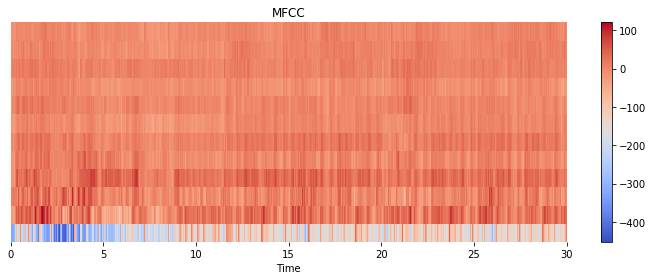

In [17]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [18]:
mfccs

array([[-2.83951105e+02, -2.89414533e+02, -3.06393623e+02, ...,
        -1.60130999e+02, -4.82522770e+01,  1.65649411e+01],
       [-2.70710379e+01, -3.20438808e+01, -3.46506639e+01, ...,
         5.83877551e+01,  4.27002035e+01,  3.88523411e+01],
       [ 6.81091076e+00,  3.18668203e+00,  3.73686295e+00, ...,
        -6.82883588e+00,  1.01565856e+01,  1.96787492e+00],
       ...,
       [ 1.55644227e+01,  1.43639719e+01,  7.40209894e+00, ...,
         1.22689754e+01,  5.00647579e+00,  9.56658591e-02],
       [-6.84549984e+00, -6.03557504e+00, -8.51113192e+00, ...,
         2.76642637e+01,  1.63695411e+01,  3.15216683e+00],
       [ 3.26795593e+00, -1.33321409e+00, -1.01246700e+01, ...,
         2.13484748e+01,  1.44214105e+01,  1.65673250e+00]])

In [19]:
mfccs.shape

(12, 1292)

In [20]:
mel = librosa.feature.melspectrogram(x)

In [21]:
mel

array([[1.63769056e-03, 8.71870643e-04, 6.52438615e-04, ...,
        3.39360514e-01, 8.15035680e-01, 1.55319485e+00],
       [2.14528595e-03, 4.23571622e-03, 4.04731554e-03, ...,
        2.22132268e+01, 5.64909645e+01, 2.85128072e+01],
       [9.18420101e-04, 9.58627168e-04, 5.50281312e-04, ...,
        9.34230356e+01, 9.26326703e+01, 2.27969049e+01],
       ...,
       [1.07339298e-02, 8.14710133e-03, 8.70056238e-03, ...,
        2.83625098e-03, 1.11342262e-01, 1.88394246e-01],
       [2.06725449e-03, 1.97814794e-03, 1.45916366e-03, ...,
        1.30253711e-03, 7.43304352e-02, 1.32102070e-01],
       [4.01060908e-04, 2.31798236e-04, 8.10447805e-05, ...,
        7.28174896e-05, 4.54621598e-03, 1.11221770e-02]])

In [22]:
mel.shape

(128, 1292)

In [25]:
hop_length = 512
tempo = librosa.feature.tempogram(x, hop_length=hop_length)

/home/kameswar/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1377: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_agg[idx_agg] = aggregate(data[idx_in], axis=axis)
/home/kameswar/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
/home/kameswar/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:447: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the fut

In [26]:
tempo

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [6.22170149e-01, 6.22211038e-01, 6.22252207e-01, ...,
        7.19824350e-01, 7.20593033e-01, 7.21360258e-01],
       [2.27399269e-01, 2.27399119e-01, 2.27399331e-01, ...,
        4.51527774e-01, 4.52813821e-01, 4.54100595e-01],
       ...,
       [6.94008730e-16, 6.97129713e-16, 4.77141062e-16, ...,
        2.65572037e-12, 5.46381117e-13, 4.38827775e-14],
       [3.44248948e-16, 3.69729809e-16, 2.74201102e-16, ...,
        4.01062485e-13, 8.86452624e-14, 2.20696593e-15],
       [1.57445283e-16, 2.33098049e-16, 1.58098280e-16, ...,
        9.26685944e-16, 4.76924728e-16, 1.13038118e-16]])

In [27]:
tempo.shape

(384, 1292)

In [28]:
tempo.sum()

64323.95715092122

In [29]:
tempo.mean()

0.12965193891681426

In [ ]:
a = zcr.flatten()
b = sc.flatten()
c = mfccs.flatten()
d = mel.flatten()

In [ ]:
a

In [ ]:
b

In [ ]:
c

In [ ]:
d

In [ ]:
a.shape

In [ ]:
b.shape

In [ ]:
c.shape

In [ ]:
d.shape

In [ ]:
#a1 = numpy.concatenate((a,b,c,d))
a1 = [zcr, sc, mfccs, mel]

In [ ]:
a1

In [ ]:
a1.shape

In [ ]:
a2 = [a, b, c, d]

In [ ]:
a2

In [ ]:
train_features = numpy.vstack((a2, a2))

In [ ]:
train_features

In [ ]:
train_features.shape

In [ ]:
len(a2)

In [ ]:
len(train_features)